# Part 2

## Premessa
Si devono realizzare algoritmi che riducano al minimo gli errori che si commettono sia nella fase di memorizzazione dei numeri che quando si eseguono operazioni tra loro. È molto importante saper interpretare i risultati che fornisce un algoritmo.

## Exercise 1

Confrontare  i  risultati  delle  operazioni $(0.3-0.2)-0.1$ e $0.3-(0.2 + 0.1)$ e fornire una spiegazione a quanto osservato.  Ripetere l’esercizio con le operazioni $0.1\ast (0.2 + 0.5)$ e $0.1\ast 0.2 + 0.1\ast 0.5$.

Ad esempio per la rappresentazione del numero  si ha prima la rappresentazione tramite arrotondamento, si ottiene  in cui si aggiunge alla 54-esima cifra (mantissa di 53 cifre nella rappresentazione di MATLAB) la base mezza (1 in questo caso visto che MATLAB memorizza in base 2). Il numero che si ottiene va normalizzato dato che la prima cifra di mantissa non è 1.

In [1]:
format long
# dati iniziali
a = 0.1;
b = 0.2;
c = 0.3;

# svolgimento delle operazioni
ris1 = (c - b) - a
ris2 = c - (b + a)

ris1 =   -2.775557561562891e-17
ris2 =   -5.551115123125783e-17


Nel secondo caso si ottiene un numero diverso, più piccolo del primo. Si ha un'approssimazione di questo tipo perché si svolgono operazioni di somma algebrica tra numeri molto vicini e si verifica il fenomeno della cancellazione numerica.

Si ha che non vale la proprietà associativa tra numeri finiti, infatti assemblando i calcoli in modo differente si ottengono risultati diversi. Questa diversità dei risultati è dovuta ad approssimazioni di tipo differente (arrotondamento per eccesso o per difetto).

### Calcolo dell'indice algoritmico

In [2]:
format short
I_alg_1 = abs(a + b)/abs(a + b + c) + 1 % (a + b) + c
I_alg_2 = abs(b + c)/abs(a + b + c) + 1 % a + (b + c)

I_alg_1 =  1.5000
I_alg_2 =  1.8333


L'operazione $(a + b) + c$ è più stabile di $a + (b + c)$ per la particolare scelta dei valori di $a$,$b$ e $c$.

## Exercise 2
Siano $a = 1.234567890123400e+15$, $b=−1.234567890123401e+15$, $c= 0.06$. Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$.  
Che cosa si osserva?  Ripetere l’esercizio con $a = 0.23371258e-4$, $b = 0.33678429e+ 2$, $c = -0.33677911e+ 2$.

In [3]:
# dati iniziali
a = 1.234567890123400e+15;
b = -1.234567890123401e+15;
c = 0.06;

d = 0.23371258e-4;
e = 0.33678429e+2;
f = 0.33677911e+2;

Nel primo caso si osservano i fenomeni della **cancellazione** e dell'**assorbimento**. Il primo si verifica quando si sottraggono numeri molto vicini tra loro. Il secondo quando sono coinvolti nell'operazione numeri con ordine di grandezza molto diversi.

In [4]:
# svolgimento delle operazioni
a + b
ris3 = (a + b) + c
a + c
ris4 = (a + c) + b
b + c
ris5 = a + (b + c)
d + e
ris6 = (d + e) + f
d + f
ris7 = (d + f) + e
f + e
ris8 = d + (f + e)

ans = -1
ris3 = -0.94000
ans =  1234567890123400
ris4 = -1
ans = -1234567890123401
ris5 = -1
ans =  33.678
ris6 =  67.356
ans =  33.678
ris7 =  67.356
ans =  67.356
ris8 =  67.356


## Exercise 3
Nell’aritmetica di matlab sommare per $i = 1,...10$ gli addendi $w_i$ con $w_i = 0.1e-15$ e , per $i = 2,...,10$.  
Come è meglio procedere?

In [5]:
# dati iniziali
w = 0.1e-15;

L'ordine con cui si sommano i numeri influisce sul risultato finale. La seconda approssimazione è in generale migliore, infatti conviene sommare i numeri in ordine crescente. 

Si dimostra in particolare che l'indice algoritmico per l'algoritmo di somma di $n$ numeri macchina è pari a: $I_{ALG} = n - 1$. Perciò l'algoritmo risulta stabile. Queste considerazioni valgono nel caso in cui si sommano algebricamente numeri di segno concorde.

In [6]:
# svolgimento delle operazioni
s1 = sum([1 ones(1,9)*w])
s2 = sum([ones(1,9)*w 1]) % somma in ordine crescente

s1 =  1
s2 =  1.0000


## Exercise 4
Si considerino le espressioni $y_1 = \sqrt{x^2 +1}-x$ e $y_2 = \frac{1}{\sqrt{x^2+1}+x}$.
Calcolare il valore di $y_1$ e $y_2$ per $x = 7777$ e $x = 77777777$.  
Che cosa si osserva?  Commentare i risultati ottenuti.

In [7]:
# dati iniziali
x1 = 7777;
x2 = 77777777;

In questo caso si verifica il fenomeno di cancellazione. Si nota a partire dall'ottava cifra decimale.

In [8]:
# svolgimento operazioni
format long
y1 = sqrt( x1^2 + 1 ) - x1
y2 = 1 / (sqrt( x1^2 + 1 ) + x1)

y1 =    6.429214317904552e-05
y2 =    6.429214323431402e-05


Si ha la somma di numeri con ordini di grandezza differenti con conseguente cancellazione di cifre significative.
La migliore approssimazione è la seconda perché elimina l'operazione di differenza.

In [9]:
y3 = sqrt( x2^2 + 1 ) - x2 # sqrt(x2^2+1) ~ x2, quindi si sottraggono quantità molto vicine
y4 = 1 / (sqrt( x2^2 + 1 ) + x2)

y3 = 0
y4 =    6.428571492857143e-09


## Exercise 5

Valutare teoricamente l’errore relativo che si commette calcolando in aritmetica floating point l’espressione:


$$ A(x) = \frac{1}{x} - \frac{1}{(x+1)} $$

rispetto al valore esatto, assumendo che $x$ e $x+1$ non siano affetti da errore di rappresentazione.  
Verificare poi in ambiente Matlab il risultato ottenuto, considerando come valori di $x$ il vettore $[10^0,10^1, ...,10^{20}]$ contenente successive potenze di 10, e usando un gafico in scala logaritmica su $x$ e $y$ per confrontare l’errore relativo ottenuto con quello previsto dalla teoria.


Si consideri come valore esatto quello calcolato in Matlab con l’espressione algebricamente equivalente:


$$ B(x) = \frac{1}{x(x+1)} $$

### Risoluzione teorica
$Hp\ x,x+1 \in F$

$fl(A(x)) = (1x(1+\varepsilon r)-1/(x+1)$

    __plt__>__plt2vv__ at line 495 column 10
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    loglog at line 60 column 10
    __plt__>__plt2vv__ at line 495 column 10
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    loglog at line 60 column 10
    __plt__>__plt2vv__ at line 495 column 10
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    loglog at line 60 column 10
    text at line 170 column 10
    legend at line 1013 column 17


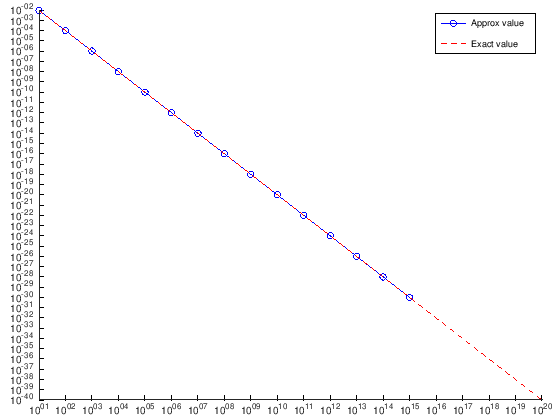

In [10]:
# dati iniziali
format long e
col = ["r","b:"];

## preallocazione
vetX = ones([1,20]);
vetY = ones([1,20]);
vetZ = ones([1,20]);

# svolgimento delle operazioni
for i=1:20
    vetX(i) = 10^i;

    vetY(i) = 1 / vetX(i) - 1 / ( vetX(i) + 1 );
    vetZ(i) = 1 / ( vetX(i) * ( vetX(i) + 1 ) );
end

loglog(vetX,vetY, 'bo-', vetX,vetZ, 'r--');
legend("Approx value", "Exact value");
box off
warning ("off", "Octave:negative-data-log-axis");

Con uno zoom è possibile notare che i valori divergono, in particolare il valore approssimato tende a essere minore del valore esatto.

## Exercise 6

Quali problemi si possono incontrare nel calcolo delle radici di $ax^2 + bx+ c$?

Provare a risolvere l’equazione $x^2 + 10kx + 1 = 0$ con `k = 1 : 1 : 8`. 

Che cosa si osserva?

In [11]:
format long
clear a b c x1 x2
a = 1;
c = 1;
x1 = ones([1,8]);
x2 = ones([1,8]);

for k = 1:8
    b = 10^k;
    x1(k) = (-b + sqrt(b^2 - 4 * a * c)) / (2 * a);
    x2(k) = (-b - sqrt(b^2 - 4 * a * c)) / (2 * a);
end

x1
x2

x1 =

 Columns 1 through 3:

  -1.010205144336442e-01  -1.000100020004879e-02  -1.000001000022621e-03

 Columns 4 through 6:

  -1.000000011117663e-04  -1.000000338535756e-05  -1.000007614493370e-06

 Columns 7 and 8:

  -9.965151548385620e-08  -7.450580596923828e-09

x2 =

 Columns 1 through 3:

  -9.898979485566356e+00  -9.998999899979995e+01  -9.999989999990000e+02

 Columns 4 through 6:

  -9.999999899999999e+03  -9.999999999000000e+04  -9.999999999990000e+05

 Columns 7 and 8:

  -9.999999999999899e+06  -1.000000000000000e+08



## Exercise 7

Scrivere uno script Matlab che fornisca le approssimazioni di  ottenute con la formula:

$$ f(n) = \left( \frac{1}{n} + 1 \right) n $$

per $n = 10k$ e $k = 0,...,16$.

Cosa si osserva? Commentare i risultati ottenuti.

fn =

 Columns 1 through 4:

   2.000000000000000   2.593742460100002   2.704813829421528   2.716923932235594

 Columns 5 through 8:

   2.718145926824926   2.718268237192297   2.718280469095753   2.718281694132082

 Columns 9 through 12:

   2.718281798347358   2.718282052011560   2.718282053234788   2.718282053357110

 Columns 13 through 16:

   2.718523496037238   2.716110034086901   2.716110034087023   3.035035206549262

 Column 17:

   1.000000000000000



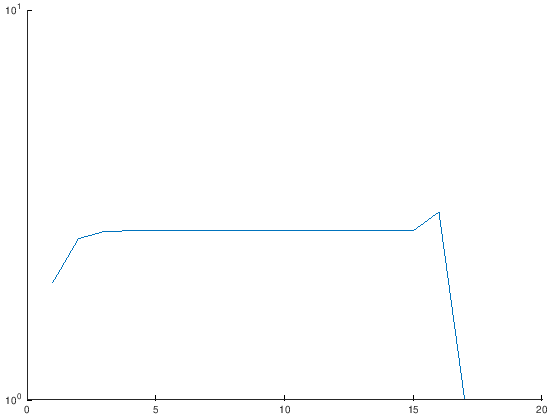

In [12]:
# dati iniziali
e = exp(1);
fn = ones([1,17]);

# svolgimento delle operazioni
for k=1:17
    n = 10^(k-1);
    fn(k) = (1/n + 1)^n;
end

fn
semilogy(fn)
box off